LINMA2370 - Project Part 1: Modeling the transition dynamics of tropical rainforests

Authors: Raphael Mugenzi Byiringiro & Dinh Thanh Phong Do

NOMA: 32421600 & 13601700

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from scipy.integrate import solve_ivp
from scipy.optimize import fsolve

In [13]:
def get_default_params():
    #Default values from Table 1
    R0  =  2.0  #[mm/day]   default amount of rainfall 
    r_m =  0.3  #[1/yr]     maximal rate of tree cover expansion rate
    h_R =  0.5  #[mm/day]   rainfall value where r is reduced by half
    m_n =  0.15 #[1/yr]     maximal loss rate due to nursing effect
    h_n = 10    #[%]        tree cover below which rate of loss increases steeply (nursing effect)
    m_f =  0.11 #[1/yr]     maximal rate of loss due to fire mortality
    h_f = 60    #[%]        tree cover below which rate of loss increases steeply (fire mortality)
    p   =  7    #[]         Hill function exponent
    k   = 90    #[%]        Maximal carrying capacity
    return R0, r_m, h_R, m_n, h_n, m_f, h_f, p, k

## Question 1
### 1.a

In [14]:
def percapitaLogisticGrowth(R, T, params):

    R0, r_m, h_R, m_n, h_n, m_f, h_f, p, k = params
    r = r_m * (R/(h_R + R))
    
    return r * (1 - (T/k))

def solve_percapitaLogisticGrowth(R, T0, params,t=np.linspace(0.1,50,100)):
    
    f_tT = lambda t,T : T*percapitaLogisticGrowth(R,T,params)
    T = solve_ivp(f_tT,[t[0],t[-1]],[T0],method='RK45',t_eval=t)

    return t,T.y[0][:]

### 1.b

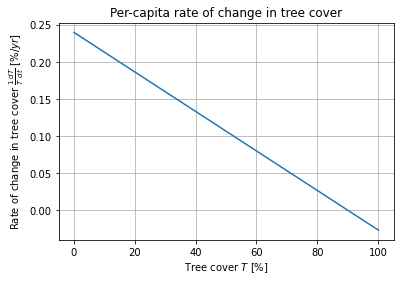

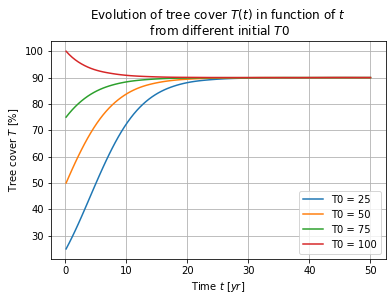

In [15]:
params = get_default_params()
R0 = params[0]
Tl = np.linspace(0.1, 100, 1000)

plt.figure()
plt.plot(Tl, percapitaLogisticGrowth(R0, Tl, params), color ='tab:blue') #function plot
plt.xlabel(r'Tree cover $T$ $\left[\%\right]$')
plt.ylabel(r'Rate of change in tree cover $\frac{1}{T} \frac{dT}{dt}$ $\left[\% / yr\right]$')
plt.title('Per-capita rate of change in tree cover')
plt.grid()
plt.savefig('Q1_1.png')
plt.show()

T0s = [25,50,75,100]
plt.figure()
for T0 in T0s:
    t,T = solve_percapitaLogisticGrowth(R0, T0, params)
    plt.plot(t,T,label="T0 = %d"%T0)

plt.xlabel(r'Time $t$ $\left[yr\right]$')
plt.ylabel(r'Tree cover $T$ $\left[\%\right]$')
plt.title('Evolution of tree cover $T(t)$ in function of $t$ \n from different initial $T0$')
plt.legend()
plt.grid()
plt.savefig('Q1_2.png')
plt.show()


## Question 2
### 2.a

In [16]:
def percapitaNursingeffects(R,T,params):

    R0, r_m, h_R, m_n, h_n, m_f, h_f, p, k = params
    return -m_n*(h_n/(T + h_n))

def percapitaLogisticNursingeffects(R, T, params):

    R0, r_m, h_R, m_n, h_n, m_f, h_f, p, k = params

    log_gro = percapitaLogisticGrowth(R,T,params)
    nur_eff = percapitaNursingeffects(R,T,params)

    return log_gro + nur_eff

def solve_percapitaLogisticNursingeffects(R, T0, params,t=np.linspace(0.1,50,100)):
    
    f_tT = lambda t,T : T*(percapitaLogisticNursingeffects(R,T,params))
    T = solve_ivp(f_tT,[t[0],t[-1]],[T0],method='RK45',t_eval=t)

    return t,T.y[0][:]

### 2.b

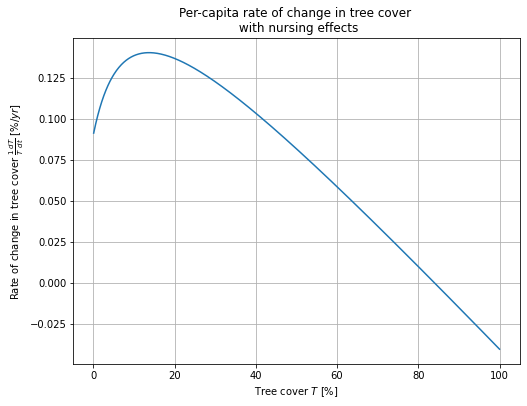

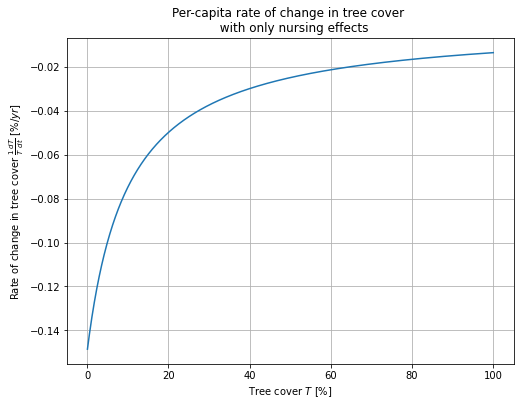

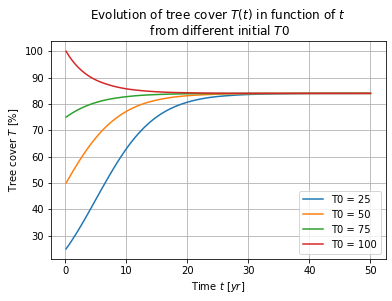

we observe 4 intersections:
[84.01704215 84.01704215 84.01704215 84.01704215]


In [17]:
params = get_default_params()
R0 = params[0]

Tl = np.linspace(0.1, 100, 1000)

plt.figure(figsize=(8, 6))
plt.plot(Tl, percapitaLogisticNursingeffects(R0, Tl, params), color ='tab:blue') #function plot

plt.xlabel(r'Tree cover $T$ $\left[\%\right]$')
plt.ylabel(r'Rate of change in tree cover $\frac{1}{T} \frac{dT}{dt}$ $\left[\% / yr\right]$')
plt.title('Per-capita rate of change in tree cover \n with nursing effects')
plt.grid()
plt.savefig('Q2_1.png')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(Tl, percapitaNursingeffects(R0, Tl, params), color ='tab:blue') #function plot

plt.xlabel(r'Tree cover $T$ $\left[\%\right]$')
plt.ylabel(r'Rate of change in tree cover $\frac{1}{T} \frac{dT}{dt}$ $\left[\% / yr\right]$')
plt.title('Per-capita rate of change in tree cover \n  with only nursing effects')
plt.grid()
plt.savefig('Q2_2.png')
plt.show()

T0s = [25,50,75,100]
plt.figure()
for T0 in T0s:
    t,T = solve_percapitaLogisticNursingeffects(R0, T0, params)
    plt.plot(t,T,label="T0 = %d"%T0)

plt.xlabel(r'Time $t$ $\left[yr\right]$')
plt.ylabel(r'Tree cover $T$ $\left[\%\right]$')
plt.title('Evolution of tree cover $T(t)$ in function of $t$ \n from different initial $T0$')
plt.legend()
plt.grid()
plt.savefig('Q2_3.png')
plt.show()

f = lambda t:percapitaLogisticNursingeffects(R0, t, params)
print("we observe 4 intersections:")
print(fsolve(f,[5,20,60,90]))

## Question 3
### 3.a

In [18]:
def percapitaFireeffect(R, T, params):

    R0, r_m, h_R, m_n, h_n, m_f, h_f, p, k = params
    
    return -m_f * (pow(h_f, p) / (pow(T, p) + pow(h_f, p)))

### 3.b

In [19]:
def percapitaLogisticNursingFireeffects(R, T, params):

    log_gro = percapitaLogisticGrowth(R, T, params)
    nur_eff = percapitaNursingeffects(R,T,params)
    fir_eff = percapitaFireeffect(R, T, params)
    
    return log_gro + nur_eff + fir_eff

def solve_percapitaLogisticNursingFireeffects(R, T0, params,t=np.linspace(0.1,50,100)):
    
    f_tT = lambda t,T : T*(percapitaLogisticNursingFireeffects(R,T,params))
    T = solve_ivp(f_tT,[t[0],t[-1]],[T0],method='RK45',t_eval=t)

    return t,T.y[0][:]

### 3.c

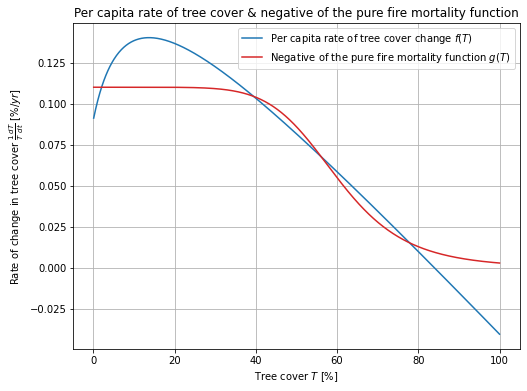

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


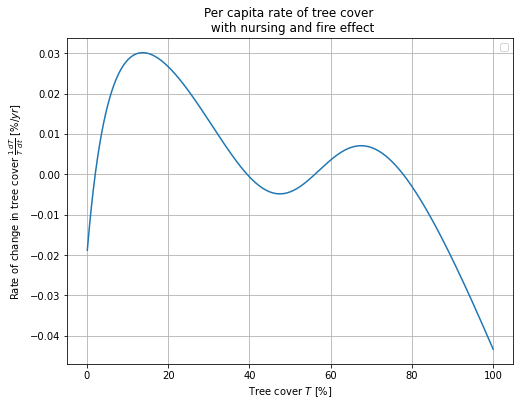

we observe 4 intersections:
[ 2.04321922 39.46337003 56.09687637 77.87192259]


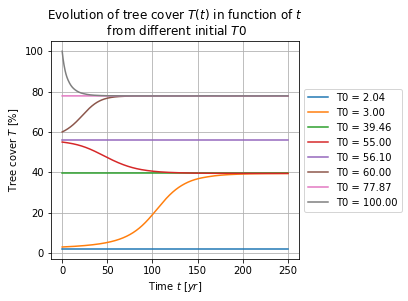

In [20]:
params = get_default_params()
R0 = params[0]

Tl = np.linspace(0.1, 100, 1000)


plt.figure(figsize=(8, 6))
plt.plot(Tl, percapitaLogisticNursingeffects(R0, Tl, params), color ='tab:blue', label = r'Per capita rate of tree cover change $f(T)$ ')
plt.plot(Tl, -percapitaFireeffect(R0, Tl, params) , color = 'tab:red', label = r'Negative of the pure fire mortality function $g(T)$ ')
plt.xlabel(r'Tree cover $T$ $\left[\%\right]$')
plt.ylabel(r'Rate of change in tree cover $\frac{1}{T} \frac{dT}{dt}$ $\left[\% / yr\right]$')
plt.title('Per capita rate of tree cover & negative of the pure fire mortality function')
plt.grid()
plt.legend()
plt.savefig('Q3_1.png')
plt.show()

x = Tl
y = percapitaLogisticNursingFireeffects(R0, Tl, params)
plt.figure(figsize=(8, 6))
plt.plot(Tl, percapitaLogisticNursingFireeffects(R0, Tl, params), color ='tab:blue')
plt.xlabel(r'Tree cover $T$ $\left[\%\right]$')
plt.ylabel(r'Rate of change in tree cover $\frac{1}{T} \frac{dT}{dt}$ $\left[\% / yr\right]$')
plt.title('Per capita rate of tree cover \n with nursing and fire effect')
plt.grid()
plt.legend()
plt.savefig('Q3_2.png')
plt.show()


fg = lambda t:percapitaLogisticNursingeffects(R0, t, params) + percapitaFireeffect(R0, t, params)
print("we observe 4 intersections:")
print(fsolve(fg,[5,20,60,90]))

T0s =[2.04321922, 3.0, 39.46337003,55.0, 56.09687637,60.0, 77.87192259,100]
plt.figure()
for T0 in T0s:
    t,T = solve_percapitaLogisticNursingFireeffects(R0, T0, params,np.linspace(0.1,250,1000))
    plt.plot(t,T,label="T0 = %1.2f"%T0)

plt.xlabel(r'Time $t$ $\left[yr\right]$')
plt.ylabel(r'Tree cover $T$ $\left[\%\right]$')
plt.title('Evolution of tree cover $T(t)$ in function of $t$ \n from different initial $T0$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.subplots_adjust(right=0.7)
plt.savefig('Q3_3.png')
plt.show()


## Question 4
### 4.a

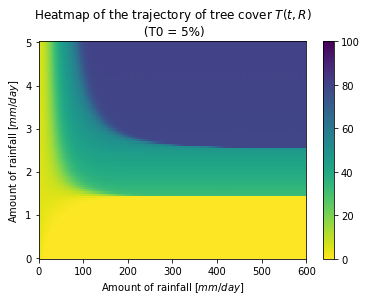

c:\Users\dinht\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.


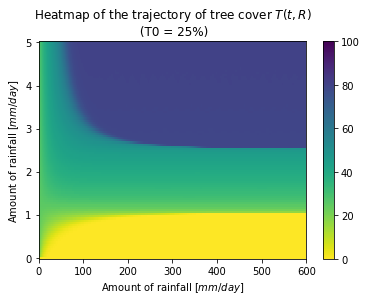

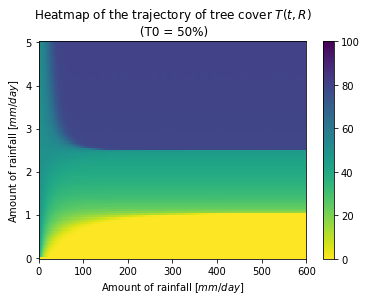

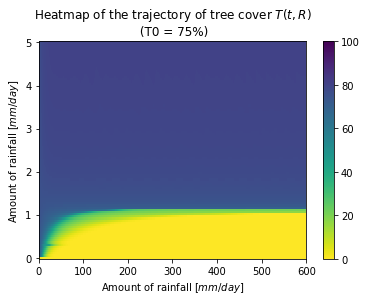

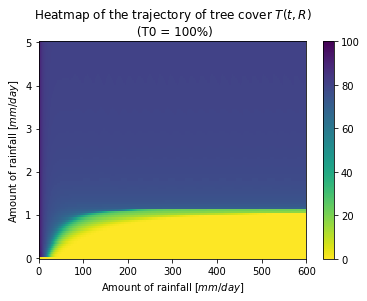

In [21]:
Rs = np.linspace(0,5,100)
n=5
T0s = [5,25,50,75,100]
ts= np.linspace(0,600,1000)

X = [] #ts
Y = [] #Rs
Z = [] #Ts

X_600 = []
Y_600 = []
Z_600 = []
#interactive plotting in separate window
# %matplotlib qt 

for T0 in T0s:
    
    for R in Rs:
        t,T = solve_percapitaLogisticNursingFireeffects(R,T0,params,ts)
        Z.append(T)
        X.append(t)
        Y.append(R*np.ones(len(t)))

        X_600.append(T0)
        Y_600.append(R)
        Z_600.append(T[-1])

    plt.figure()
    plt.xlabel(r'Amount of rainfall $\left[mm/day\right]$')
    plt.ylabel(r'Amount of rainfall $\left[mm/day\right]$')

    plt.pcolormesh(np.array(X),np.array(Y),np.array(Z),cmap = 'viridis_r',vmax=100,vmin=0)
    plt.title(r"Heatmap of the trajectory of tree cover $T(t,R)$"+"\n (T0 = %d"%(T0)+"%)")

    plt.colorbar()
    plt.savefig('Q4_%d.png'%T0)
    plt.show()


### 4.b

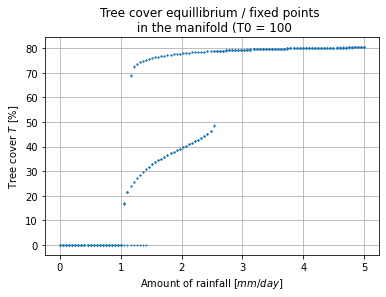

In [22]:
X_600 = np.reshape(X_600,(n,100))
Y_600 = np.reshape(Y_600,(n,100))
Z_600 = np.reshape(Z_600,(n,100))
plt.figure()

for i in range(len(Y_600)):
    plt.plot(Y_600[i,:],Z_600[i,:],".",color ='tab:blue',markersize=2)

plt.ylabel(r'Tree cover $T$ $\left[\%\right]$')
plt.xlabel(r'Amount of rainfall $\left[mm/day\right]$')
plt.title("Tree cover equillibrium / fixed points \n in the manifold (T0 = %d" %T0s[i])
plt.grid()
plt.savefig("Q4_final.png")
plt.show()
